In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import scipy.sparse as sparse
import scipy.linalg as la

In [23]:
Ls = [10]
levels = 11
mn = .1
mx = .5
log = False
hs = (np.logspace(mn, mx, levels) if log else np.linspace(mn, mx, levels))
data = np.zeros((len(Ls),2,levels))
for i, L in enumerate(Ls):
    
#     trials = 260 - 20*L
    trials = 200
    rs = np.zeros((trials, levels))
    
    # Only create these once
    H0 = asym.dense_H(L)
    _, _, _, sig_z_list = ([sig/2 for sig in sigs] for sigs in qm.get_sigma_lists(L))

    for idx, h in enumerate(hs):
        for j in range(trials):
            H_pert = qm.get_local_field(sig_z_list, np.random.rand(L)*2*h - h)/2
            H = H0 + H_pert
            choose = L//2
            rs[j, idx] = qm.get_r(asym.mat2list(H)[choose].A, nonz=True)

    data[i] = qm.mean_and_std(rs)
#     rs[i,0] = mean
#     rs[i,1] = std
    print(L)

10


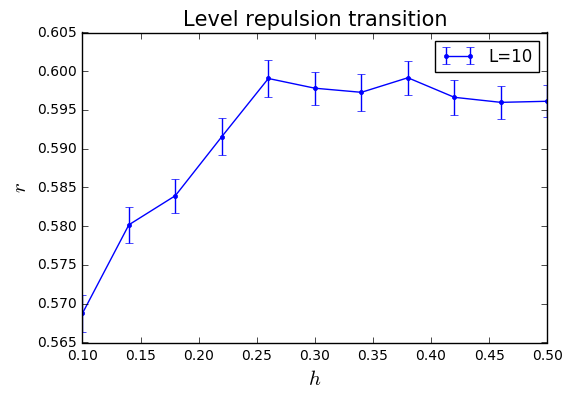

In [24]:
ax = plt.subplot(111)
for i, L in enumerate(Ls):
    if log: ax.set_xscale("log", nonposx='clip')
    ax.errorbar(
        hs,
        data[i,0],
        yerr = data[i,1],
        marker = '.',
        drawstyle = 'steps-mid-',
        label ='L='+str(L)
    )
    plt.xlabel('$h$', fontsize=15)
    plt.ylabel('$r$', fontsize=15)
#     plt.ylim(.4,.6)
plt.legend()
plt.xlim(mn,mx)
plt.title("Level repulsion transition", fontsize=15)
# plt.savefig("figures/levelrepultrans.pdf")
plt.show()

# Load data

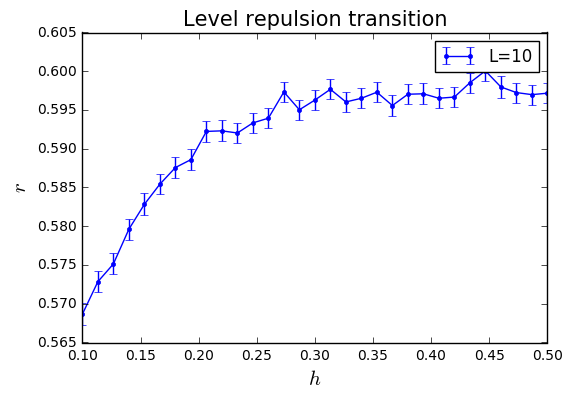

In [6]:
Ls = [10]
levels = 31
mn = .1
mx = .5
log = False
add = "log" if log else ""
hs = (np.logspace(mn, mx, levels) if log else np.linspace(mn, mx, levels))
data = np.load("data/phasetrans_min"+str(mn)+"mx"+str(mx)+add+".npy")
ax = plt.subplot(111)
for i, L in enumerate(Ls):
#     if (i==0): continue
    if log: ax.set_xscale("log", nonposx='clip')
    ax.errorbar(
        hs,
        data[i,0],
        yerr = data[i,1],
        marker = '.',
        drawstyle = 'steps-mid-',
        label ='L='+str(L)
    )
    plt.xlabel('$h$', fontsize=15)
    plt.ylabel('$r$', fontsize=15)
#     plt.ylim(.4,.6)
plt.legend()
plt.xlim(mn,mx)
plt.title("Level repulsion transition", fontsize=15)
# plt.savefig("figures/levelrepultransf.pdf")
plt.show()

In [28]:
hs

array([0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42, 0.46, 0.5 ])

In [ ]:
L = 8

H0 = asym.dense_H(L)
H0 = H0 + asym.init_pert(L, 4)
H0 = H0 + asym.finl_pert(L, 4)

alph2Sz, Sz2alph = asym.permutations(L)
plt.matshow(np.absolute(H0.A[alph2Sz][:,alph2Sz]))
plt.show()

In [ ]:
vals = np.array([-2,-1,0,1E-16, 3, 4, 5])
print('zeros:', sum(np.isclose(vals,0)))
vals = vals[np.isclose(np.isclose(vals,0),0)]
vals = vals[vals>0]
print(vals)

In [4]:
np.shape(data)

(1, 2, 31)

In [5]:
len(hs)

11